In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### Assuming Maxwellian distribution and nothing fancy

Additional assumptions:
 - plasma is not drifting
 - plasma density is sufficiently high so that sheaths are small compared to the probe dimensions
 - significant fluctuations are not present
 - secondary electron emission is not too large
 - electron neutral collision lengths are large compared to probe dimensions

Area of probe (the area of our isat probes): S $=2*10^{-6}$ m$^2$

Electron mass: m$_e = 9.109*10^{-31}$ kg

Elementary charge: e = $1.602*10^{-19}$ C

In [2]:
S = 2e-6
me = 9.109e-31
e = 1.602e-19

Density (typical): n$_{e,\infty } = 1*10^{18}$ m$^{-3}$

Plasma potential: Vp (Volts)

Temperature (Te) is givin in eV, converted later

In [3]:
ne = np.linspace(1e17, 1e19, 20)
Vp = np.linspace(5, 15, 10)
Te = np.linspace(1, 5, 15)
Te = Te * e  # convert to Joules
vsweep = np.linspace(-30, 30, 500)

Make a grid of all possible combinations of our parameter arrays

In [4]:
ne_grid, Vp_grid, Te_grid, vsweep_grid = np.meshgrid(ne, Vp, Te, vsweep, indexing='ij')

Electron saturation current: I_esat (Amps / $\sqrt{eV}$)

In [5]:
I_esat = S * ne_grid * e / np.sqrt(2 * np.pi * me)

In [6]:
current = I_esat * np.sqrt(Te_grid) * np.exp(-e * (Vp_grid - vsweep_grid) / Te_grid)  # calculate the current
esat_condition = Vp_grid < vsweep_grid
current[esat_condition] = I_esat[esat_condition] * np.sqrt(Te_grid)[esat_condition]

In [7]:
current.shape

(20, 10, 15, 500)

<IPython.core.display.Javascript object>


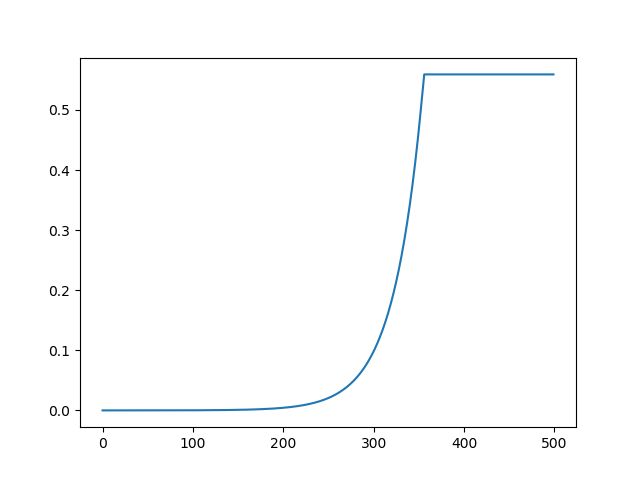

In [11]:
plt.figure()
plt.plot(current[10,7,10,:])

### Adding ion saturation current

Assumptions

- Ti << Te, so the ion saturation current is given by the Bohm current: Isat = $0.6 e n_i \sqrt{\frac{T_e}{m_i}}S$

Helium mass: m$_i=6.646*10^{27}$ kg

In [12]:
mi = 6.646e-27

In [13]:
ni = ne / 4  # dividing by 4 because we're using helium, probably
Ti = np.linspace(0.1, 0.5, 15)  # idk what normal ion temperatures are 
Ti = Ti * e  # convert to Joules

In [14]:
ni_grid, Vp_grid, Ti_grid, vsweep_grid = np.meshgrid(ni, Vp, Ti, vsweep, indexing='ij')

Ion saturation current, in units of Amps / $\sqrt{eV}$. Need to multiply by $\sqrt{T_e}$.

In [15]:
I_isat = -0.6 * S * ni_grid * e / np.sqrt(mi)

In [16]:
current_i = I_isat * np.sqrt(Te_grid) * np.exp(e * (Vp_grid - vsweep_grid) / Ti_grid)  # calculate the current
isat_condition = Vp_grid > vsweep_grid
current_i[isat_condition] = I_isat[isat_condition] * np.sqrt(Te_grid)[isat_condition]

<IPython.core.display.Javascript object>


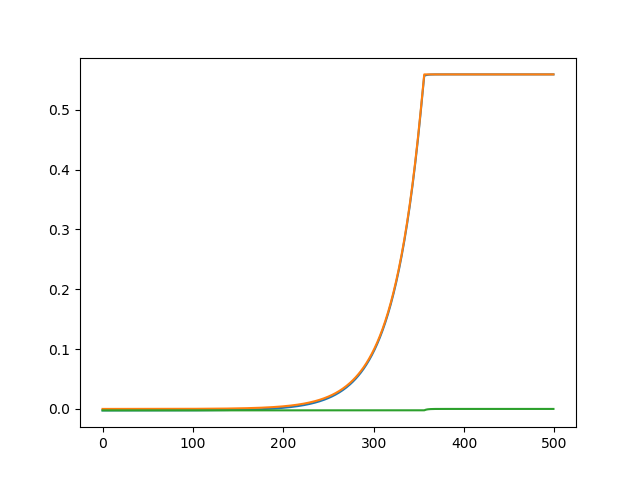

In [17]:
plt.figure()
plt.plot((current + current_i)[10,7,10,:])
plt.plot(current[10,7,10,:])
plt.plot(current_i[10,7,10,:])